<a href="https://colab.research.google.com/github/Sherryqilin/Assessment2_skills_group1/blob/Yuwei/Skills2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive; drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
articles_data = pd.read_csv("/content/drive/MyDrive/skills 2/articles.CDKN2A.csv")
paper_counts_data = pd.read_csv("/content/drive/MyDrive/skills 2/paper_counts.csv")
authors_data = pd.read_csv("/content/drive/MyDrive/skills 2/authors.CDKN2A.csv")

Text(0.5, 1.0, 'Number of CDKN2A articles published per years')

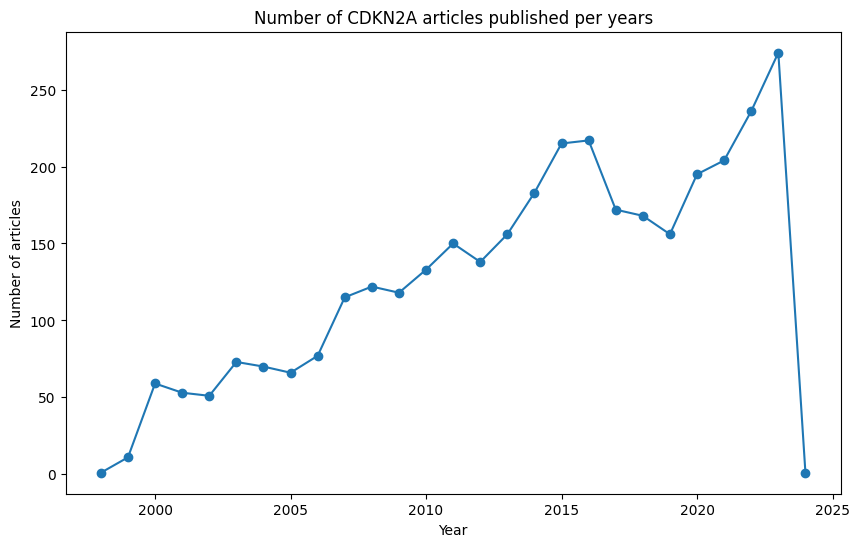

In [ ]:


articles_counts = articles_data['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(articles_counts.index,articles_counts.values, marker = 'o')
plt.xlabel("Year")
plt.ylabel("Number of articles")
plt.title("Number of CDKN2A articles published per years")

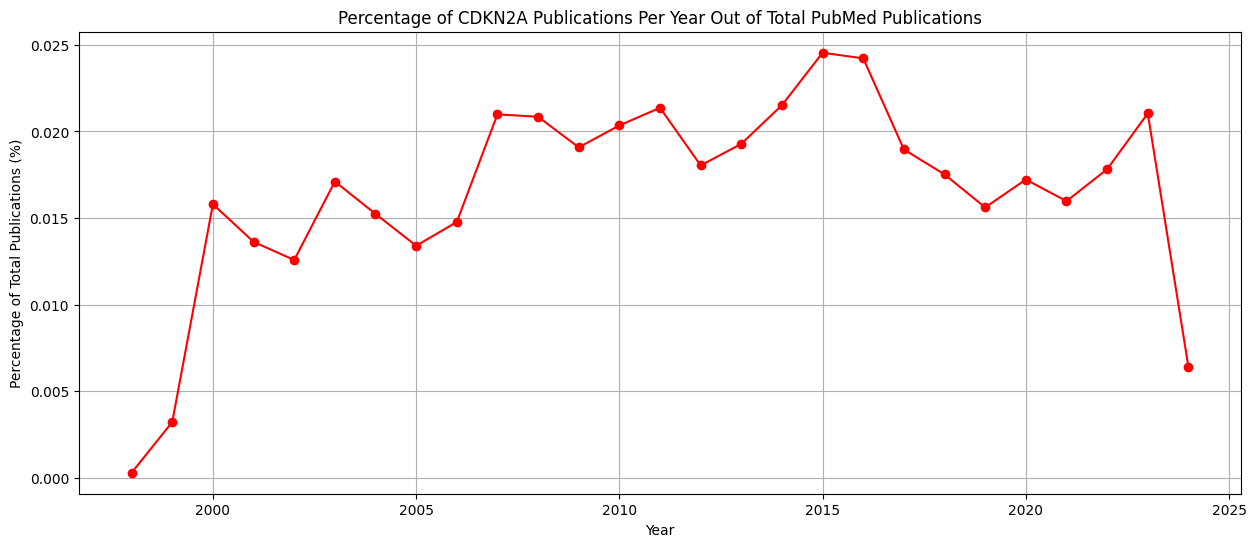

In [ ]:

# Rename the column in paper_counts_data for clarity
paper_counts_data.rename(columns={'Count': 'TotalPapers'}, inplace=True)

# Count the number of CDKN2A articles per year
CDKN2A = articles_data.groupby('Year').size().reset_index(name='CDKN2ACount')

# Merge the CDKN2A per year with total paper counts per year
merged_data = pd.merge(CDKN2A, paper_counts_data, on='Year')

# Calculate the percentage of CDKN2A publications out of total publications per year
merged_data['CDKN2APercentage'] = (merged_data['CDKN2ACount'] / merged_data['TotalPapers']) * 100

# Plotting the percentage trend
plt.figure(figsize=(15, 6))
plt.plot(merged_data['Year'], merged_data['CDKN2APercentage'], marker='o', color='red')
plt.title('Percentage of CDKN2A Publications Per Year Out of Total PubMed Publications')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Publications (%)')
plt.grid(True)
plt.show()


In [5]:
# Analyzing the most active researchers considering all authors

# Combining the 'AuthorForename' and 'AuthorLastname' to create a full name column
authors_data['Author Full Name'] = authors_data['AuthorForename'] + ' ' + authors_data['AuthorLastname']

# Identifying first and last authors for each paper
# The first author is represented by 'AuthorN' where N is 1
# The last author is represented by the maximum value of 'AuthorN' for each PMID
authors_data['First Author'] = authors_data['AuthorN'] == 1
authors_data['Last Author'] = authors_data.groupby('PMID')['AuthorN'].transform('max') == authors_data['AuthorN']

# Counting occurrences of each author as either first or last author
first_author_counts = authors_data[authors_data['First Author']]['Author Full Name'].value_counts()
last_author_counts = authors_data[authors_data['Last Author']]['Author Full Name'].value_counts()

#Top 10 most active first authors
top_10_active_first_author = first_author_counts.head(10)
print("top 10 active first author\n",top_10_active_first_author)
print("\n" + "-"*60 + "\n")
#Top 10 most active last authors
top_10_active_last_author = last_author_counts.head(10)
print("top 10 active last author\n",top_10_active_last_author)
print("\n" + "-"*60 + "\n")
# Counting occurrences of each author in the entire dataset
all_author_counts = authors_data['Author Full Name'].value_counts()

# Top 10 most active authors
top_active_researchers_all_positions = all_author_counts.head(10)
print("top 10 active authors in total\n",top_active_researchers_all_positions)


top 10 active first author
 Shuji Ogino           14
Tadeusz Debniak        7
Henry T Lynch          7
Paola Ghiorzo          7
Lisa G Aspinwall       7
Alisa M Goldstein      6
Hildur Helgadottir     6
A M Goldstein          6
Katsuhiko Nosho        5
Shumei Kato            5
Name: Author Full Name, dtype: int64

------------------------------------------------------------

top 10 active last author
 Sancy A Leachman     19
Alisa M Goldstein    15
Razelle Kurzrock     14
Hensin Tsao          14
Charles S Fuchs      14
Sakari Knuutila      11
Shuji Ogino          11
Rajiv Kumar          10
Johan Hansson         9
Susana Puig           9
Name: Author Full Name, dtype: int64

------------------------------------------------------------

top 10 active authors in total
 Alisa M Goldstein     50
Margaret A Tucker     38
Nicholas K Hayward    37
Paola Ghiorzo         36
Ralph H Hruban        31
D Timothy Bishop      29
Mark Harland          27
Charles S Fuchs       27
Shuji Ogino           2

In [ ]:
# Filtering the articles to the last 5 years
recent_articles_data = articles_data[articles_data['Year'] >= articles_data['Year'].max() - 5]

# Merging the recent articles with the authors data to get the recent authors
recent_authors_data = authors_data[authors_data['PMID'].isin(recent_articles_data['PMID'])]

# Counting the occurrences of each author in the recent dataset
recent_author_counts = recent_authors_data['Author Full Name'].value_counts()

# Displaying the top 10 most active researchers in the last 5 years
top_active_authors_recent = recent_author_counts.head(10)
top_active_authors_recent


Andreas von Deimling        12
Matija Snuderl              10
Lynette M Sholl              9
Francoise Galateau-Salle     9
Sanja Dacic                  9
Cristina R Antonescu         9
Akihiko Yoshida              8
Jeffrey S Ross               8
Kenneth Aldape               8
Andrew Churg                 8
Name: Author Full Name, dtype: int64

In [64]:
# First, we sort the dataframe by 'AuthorN' in descending order and then take the first 5 rows
top_authors_by_number = authors_data.sort_values(by='AuthorN', ascending=False).head(5)
# Extract the PMIDs for these top authors
top_author_pmids = top_authors_by_number['PMID']
print(top_author_pmids)

10309    22348646
10308    22348646
10307    22348646
10306    22348646
10305    22348646
Name: PMID, dtype: int64


In [57]:
authors_data.loc[22348646]

,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Author Full Name,First Author,Last Author
PMID,,,,,,,,
22348646,1,Antonis C,Antoniou,AC,"Centre for Cancer Genetic Epidemiology, Depart...",Antonis C Antoniou,True,False
22348646,2,Karoline B,Kuchenbaecker,KB,NaN,Karoline B Kuchenbaecker,False,False
22348646,3,Penny,Soucy,P,NaN,Penny Soucy,False,False
22348646,4,Jonathan,Beesley,J,NaN,Jonathan Beesley,False,False
22348646,5,Xiaoqing,Chen,X,NaN,Xiaoqing Chen,False,False
...,...,...,...,...,...,...,...,...
22348646,177,Torben A,Kruse,TA,NaN,Torben A Kruse,False,False
22348646,178,Georgia,Chenevix-Trench,G,NaN,Georgia Chenevix-Trench,False,False
22348646,179,Fergus J,Couch,FJ,NaN,Fergus J Couch,False,False


In [58]:
articles_data.loc[22348646]

Title                     Common variants at 12p11, 12q24, 9p21, 9q31.2 ...
Abstract                  Several common alleles have been shown to be a...
ISSN                                                              1465-542X
Journal                                        Breast cancer research : BCR
Location                                                           (14) R33
Year                                                                   2012
FirstAuthorForename                                               Antonis C
FirstAuthorLastname                                                Antoniou
FirstAuthorInitials                                                      AC
FirstAuthorAffiliation    Centre for Cancer Genetic Epidemiology, Depart...
Name: 22348646, dtype: object

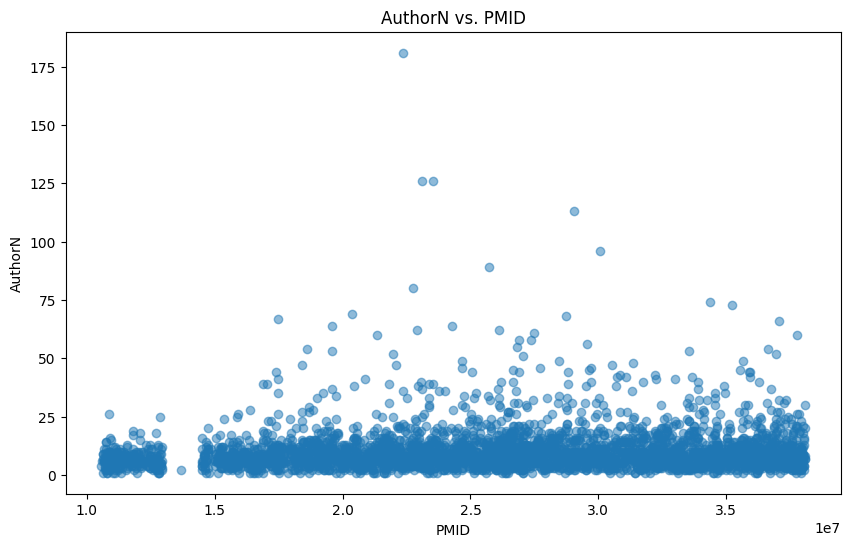

In [83]:
result = authors_data.groupby('PMID')['AuthorN'].agg('max')
result_data = result.reset_index()
#
x = result_data['PMID']
y = result_data['AuthorN']

plt.figure(figsize=(10, 6))  # 设置图形大小
plt.scatter(x, y, alpha=0.5)  # 绘制散点图
plt.title('AuthorN vs. PMID')  # 设置标题
plt.xlabel('PMID')  # 设置x轴标签
plt.ylabel('AuthorN')  # 设置y轴标签

plt.show()  # 显示图形


In [122]:
# 计算每篇文章（PMID）的作者数量
author_counts_per_paper = authors_data.groupby('PMID').size()

# 找出作者数量超过25的文章的PMID
papers_with_many_authors = author_counts_per_paper[author_counts_per_paper > 25].index

# 从数据中清除
cleaned_authors_data = authors_data[~authors_data['PMID'].isin(papers_with_many_authors)]

# 查看清理后数据中最大的AuthorN值
max_author_n_after_cleaning = cleaned_authors_data['AuthorN'].max()

cleaned_authors_data['Author Full Name'] =cleaned_authors_data['AuthorForename'] + ' ' + cleaned_authors_data['AuthorLastname']

cleaned_authors_data




<ipython-input-122-f89693855293>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_authors_data['Author Full Name'] =cleaned_authors_data['AuthorForename'] + ' ' + cleaned_authors_data['AuthorLastname']


,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Author Full Name
0,10551774,1,S J,Frost,SJ,"Centre for Cell and Molecular Medicine, School...",S J Frost
1,10551774,2,D J,Simpson,DJ,NaN,D J Simpson
2,10551774,3,R N,Clayton,RN,NaN,R N Clayton
3,10551774,4,W E,Farrell,WE,NaN,W E Farrell
4,10595918,1,G P,Nielsen,GP,Molecular Neuro-Oncology Laboratory and the Ja...,G P Nielsen
...,...,...,...,...,...,...,...
35763,38095311,4,Molly,Czachor,M,Center for Regenerative and Personalized Medic...,Molly Czachor
35764,38095311,5,Natalie,Schmier,N,"Department of Orthopaedic Surgery, School of M...",Natalie Schmier
35765,38095311,6,Claire,Pearson,C,"Department of Orthopaedic Surgery, School of M...",Claire Pearson
35766,38095311,7,Chelsea,Bahney,C,Center for Regenerative and Personalized Medic...,Chelsea Bahney


<ipython-input-133-aa03da691063>:41: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
<ipython-input-133-aa03da691063>:41: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
<ipython-input-133-aa03da691063>:41: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
<ipython-input-133-aa03da691063>:41: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
<ipython-input-133-aa03d

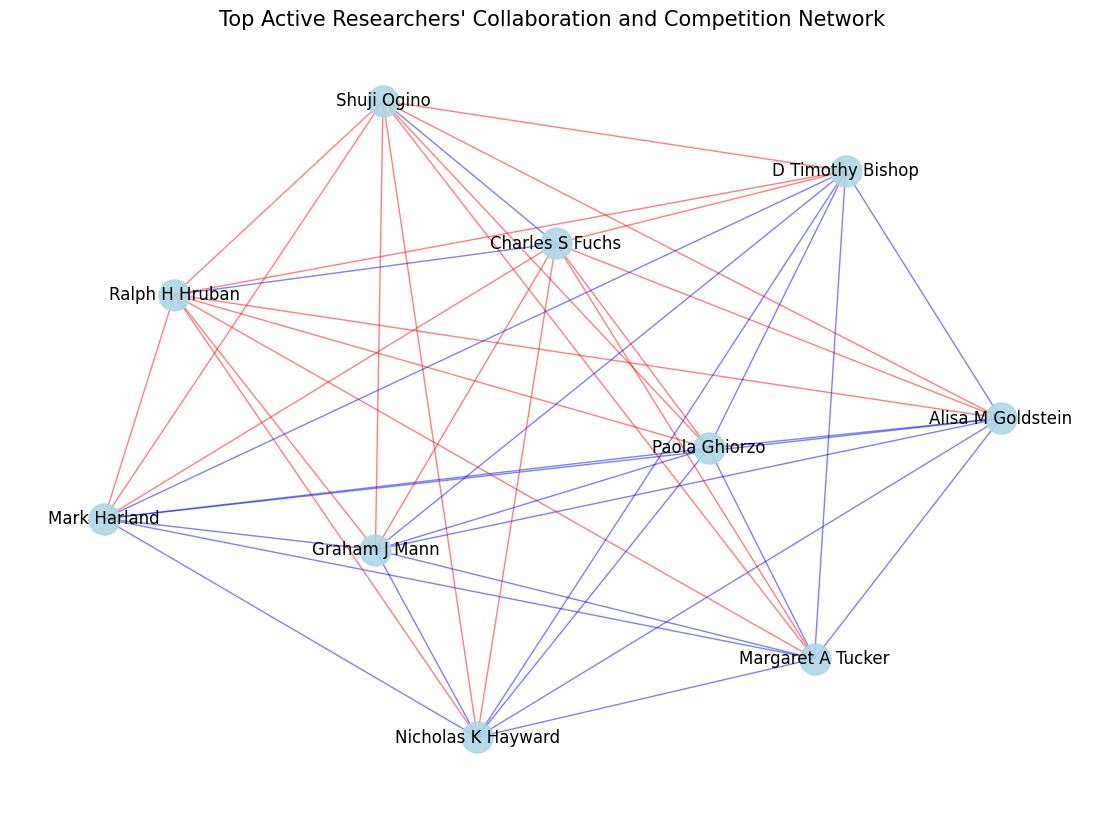

In [133]:
import networkx as nx

authors_data['Author Full Name'] = authors_data['AuthorForename'] + ' ' + authors_data['AuthorLastname']

# 计算所有作者出现的次数
all_author_counts = authors_data['Author Full Name'].value_counts()

# 获取前10名最活跃的研究人员
top_10_active_researchers = all_author_counts.head(10).index.tolist()

# 筛选出前10名最活跃研究人员的数据
top_authors_df = cleaned_authors_data[cleaned_authors_data['Author Full Name'].isin(top_10_active_researchers)]

# 创建一个新图
G_top = nx.Graph()

# 添加节点
G_top.add_nodes_from(top_10_active_researchers)

# 添加合作关系边
for _, group in top_authors_df.groupby('PMID'):
    authors = group['Author Full Name'].tolist()
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G_top.add_edge(authors[i], authors[j], color='blue')  # 合作关系

# 确定最后一位作者
last_authors = cleaned_authors_data.groupby('PMID').last()['Author Full Name']
#转换为字典，其中字典的键是文章的 'PMID'，值是该文章的最后一位作者的名字
last_author_dict = last_authors.to_dict()

# 添加竞争关系边
for i in range(len(top_10_active_researchers)):
    for j in range(i + 1, len(top_10_active_researchers)):
        author1 = top_10_active_researchers[i]
        author2 = top_10_active_researchers[j]
        if not G_top.has_edge(author1, author2):
            papers_author1 = set(cleaned_authors_data[cleaned_authors_data['Author Full Name'] == author1]['PMID'])
            papers_author2 = set(cleaned_authors_data[cleaned_authors_data['Author Full Name'] == author2]['PMID'])
            #通过交集运算符 & 来确定是否有共同的最后一位作者
            common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
            if not common_last_authors:
                G_top.add_edge(author1, author2, color='red')  # 竞争关系


# 可视化网络图
edge_colors = nx.get_edge_attributes(G_top, 'color').values()

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_top)  # 使用弹簧布局
nx.draw_networkx_nodes(G_top, pos, node_color='lightblue', node_size=500, alpha=0.9)
nx.draw_networkx_edges(G_top, pos, edge_color=edge_colors, alpha=0.5)
nx.draw_networkx_labels(G_top, pos, font_size=12, font_family="sans-serif")
plt.title("Top Active Researchers' Collaboration and Competition Network", fontsize=15)
plt.axis('off')
plt.show()


In [130]:


# Create a DataFrame to store cooperation and competition relationships
relationships_df = pd.DataFrame(columns=['Author 1', 'Author 2', 'Relationship'])

# Iterate through the edges in the network and categorize them as cooperation or competition
for author1, author2, data in G_top.edges(data=True):
    relationship = 'Cooperation' if data['color'] == 'blue' else 'Competition'
    relationships_df = relationships_df.append({'Author 1': author1, 'Author 2': author2, 'Relationship': relationship}, ignore_index=True)

# Specify the custom file path where you want to save the Excel file
custom_path = '/content/drive/My Drive/my_file.xlsx'
excel_filename = custom_path + 'top_authors_relationships.xlsx'

# Save the table to the custom file path
relationships_df.to_excel(excel_filename, index=False)

# Display a confirmation message
print(f"The relationships table has been saved as '{excel_filename}'.")


<ipython-input-130-b18baeb9683e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relationships_df = relationships_df.append({'Author 1': author1, 'Author 2': author2, 'Relationship': relationship}, ignore_index=True)
<ipython-input-130-b18baeb9683e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relationships_df = relationships_df.append({'Author 1': author1, 'Author 2': author2, 'Relationship': relationship}, ignore_index=True)
<ipython-input-130-b18baeb9683e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relationships_df = relationships_df.append({'Author 1': author1, 'Author 2': author2, 'Relationship': relationship}, ignore_index=True)
<ipython-input-130-b18baeb9683e>:7: FutureWarning: The frame.append method is d

The relationships table has been saved as '/content/drive/My Drive/my_file.xlsxtop_authors_relationships.xlsx'.


<ipython-input-130-b18baeb9683e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relationships_df = relationships_df.append({'Author 1': author1, 'Author 2': author2, 'Relationship': relationship}, ignore_index=True)
<ipython-input-130-b18baeb9683e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relationships_df = relationships_df.append({'Author 1': author1, 'Author 2': author2, 'Relationship': relationship}, ignore_index=True)
<ipython-input-130-b18baeb9683e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relationships_df = relationships_df.append({'Author 1': author1, 'Author 2': author2, 'Relationship': relationship}, ignore_index=True)
<ipython-input-130-b18baeb9683e>:7: FutureWarning: The frame.append method is d